# **Análise de crédito com SQL**

**Braian Fernandes** [link](https://www.linkedin.com/in/braian-fernandes/)

# **Conceituando**

Todo o projeto foi elaborado e explorado no **AWS athena**, junto com **S3 bucket**. Os dados estão disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset. Além disso, as imagens com os resultados da query está nesse repositório: https://github.com/braianfernandes/repositoriodeimagens.

Sobre os dados:

O presente projeto apresenta informações de clientes em um banco e conta com as seguintes colunas:

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

# **Exploração**

Vamos entender um pouquinho melhor o que temos disponível para manipulação e exploração. Para isso, vamos realizar uma visualização da tabela limitada a 10 resultados:

```sql
SELECT * FROM "default"."credito" limit 10;
```


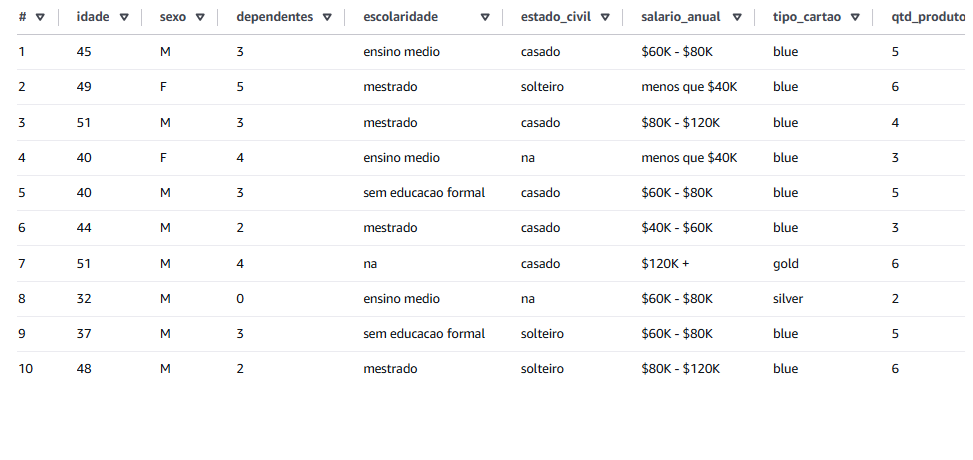

Observamos que o conjunto de dados nos apresenta diversas informações sobre determinada pessoa, como por exemplo: nível de escolaridade, estado civil, faixa de renda e entre outros, o que nos da a possibilidade de diversas análises, mesmo tendo alguns valores nulos(na).

Tendo isso em mente, e em conformidade com as crescentes demandas por igualdade de gênero na contemporaneidade, vamos tentar observar as relações entre sexo, escolaridade e salário anual dentro dos dados de crédito.

Vamos começar observando a quantidade de pessoas pertencentes a cada sexo e a distribuição da escolaridade por sexo:

```sql
SELECT count(*), sexo from credito group by sexo
```

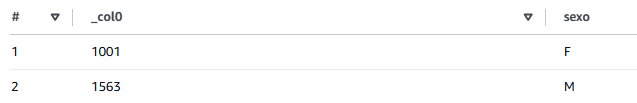

```sql
SELECT count(*), escolaridade, sexo FROM credito group by escolaridade, sexo
```

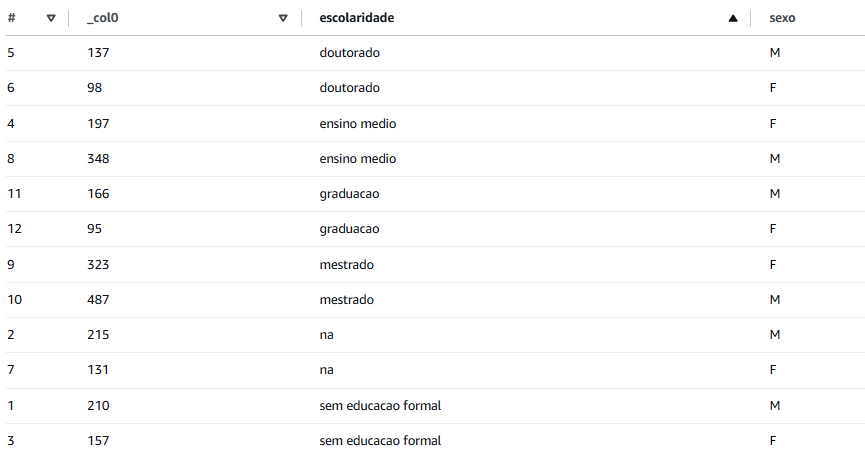

Primeiro, vemos que o número de homens é consideravelmente maior do que o número de mulheres nesse dataset. Alguns estudos complementares poderiam nos ajudar a entender se isso dá por uma questão estrutural, políticas de adesão à novos clientes ou público alvo. Mas tais análises dependeriam de informações que não constam nesse conjunto de dados.

Em seguida, podemos observar a distribuição do sexo por escolaridade. Em praticamente todos os níveis de escolaridade vemos mais homens do que mulheres. Mas também há a necessidade de se levar em conta o que se foi apresentado na query anterior.

Para finalizarmos essa etapa de exploração, vamos ver como são classificados os valores de salários anuais:

```sql
SELECT DISTINCT salario_anual FROM credito
```

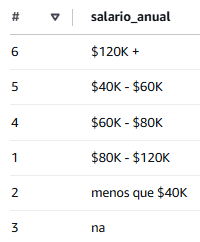

---

# **Análise**

A partir dos resultados do tópico anterior, e utilizando dos nossos conhecimentos em SQL, podemos aprofundar ainda mais a análise em cima dos dados apresentados.

Nesse sentido, vamos analisar alguns indicadores, como mínimo, média e máximo valor gasto baseado no sexo e na escolaridade:

Obs: não é do nosso interesse observar os resultados onde a escolaridade possui como resultado valor nulo.  

```sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as
min_valor_gasto, sexo, escolaridade
from credito
where escolaridade != 'na'
group by sexo, escolaridade
order by avg(valor_transacoes_12m) desc
```

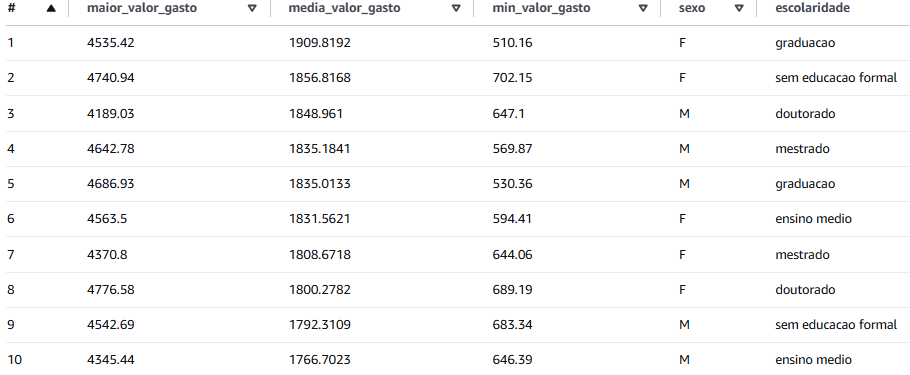

Em uma rápida análise podemos observar que os valores referentes a cada um desses indicadores varia pouco de sexo para sexo, ficando:

* Mínimo valor gasto:

  Pessoas do sexo feminino com nível de escolaridade ensino médio e graduação, possuem os menores gastos.

  Já do sexo masculino, com nível de escolaridade sem educação formal, mestrado e doutorado estão entre os que menos gastam.

* Média de valores gastos:

  Em relação aos que possuem o menor valor médio gasto, do sexo feminino, possuem nível de escolaridade mestrado e doutorado.

  Do sexo masculino, estão aqueles com nível de escolaridade sem educação formal, ensino médio e graduação.

* Maior valor gasto:

  Sexo feminino e com os menores entre os maiores valores gastos estão concentradas no nível de escolaridade graduação e mestrado.

  Já do sexo masculino, encontram-se entre sem educação formal, ensino médio e doutorado.

Vamos agora analisar os limites mínimo e máximo de crédito disponibilizados para cada sexo, levando em conta a escolaridade e limitando o resultado para 10:

```sql
select min(limite_credito) as limite_credito, escolaridade, sexo from credito
where escolaridade != 'na'
group by escolaridade, sexo
order by limite_credito desc
limit 10
```

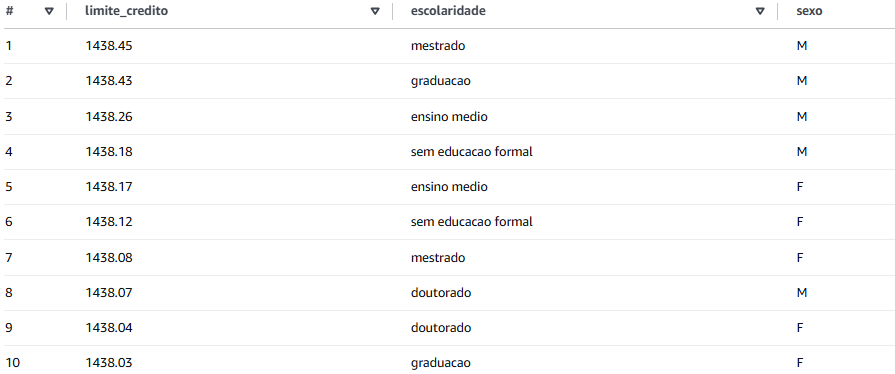

Em relação aos valores mínimos de créditos, a variação do valor é muito pequena, tendo essas pessoas de ambos os sexo, e independente da escolaridade, em uma relação bem semelhante.

```sql
select max(limite_credito) as limite_credito, escolaridade, sexo from credito
where escolaridade != 'na'
group by escolaridade, sexo
order by limite_credito desc
limit 10
```

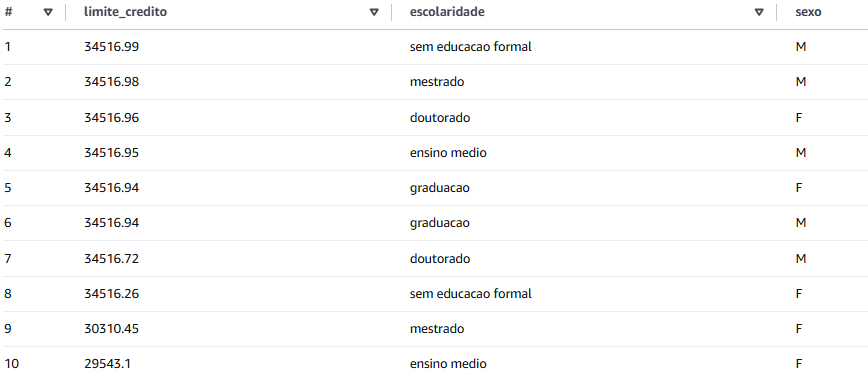

Em relação aos maiores limites de crédito, já podemos observar algumas informações interessantes e pertinentes de serem levantadas.

Como por exemplo, o valor de limite dado a uma pessoa do sexo feminino, com ensino médio, é considerávelmente inferior a uma pessoa do sexo masculino com o mesmo nível de escolaridade. Além disso, através dessa query, presenciamos que uma pessoa do sexo feminino, com doutorado comparada a mesma pessoa do sexo masculino, com ensino médio, possui uma diferença bem pequena de limite de crédito.

Por fim, vamos observar a média de limite de crédito, junto com a faixa de salário anual, limitando a busca para 10 resultados:

```sql
select sexo, salario_anual, avg(limite_credito) as media_limite, escolaridade from credito
where salario_anual != 'na' and escolaridade != 'na'
group by sexo, salario_anual, escolaridade
limit 10
```

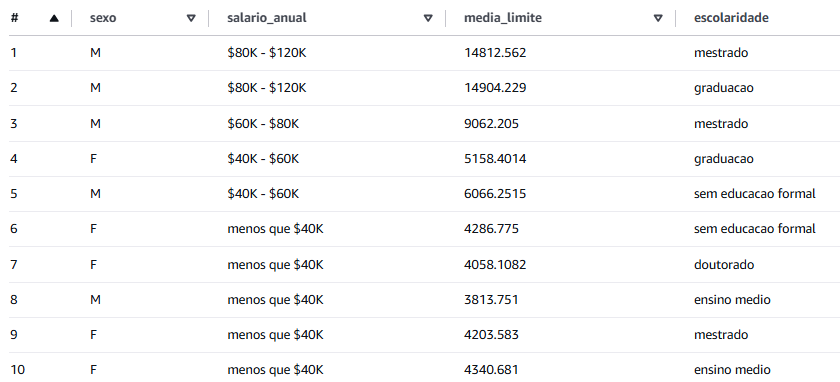

Talvez essa seja a query que mais nos apresente resultados interessantes para análise. Podemos observar que nenhuma pessoa do sexo feminino se encontra presente entre aqueles que recebem entre 80k - 120k. Na verdade, elas estão concentradas na faixa que recebe menos que $40k.

Dentro dessa mesma faixa(menos que $40k), apenas pessoas do sexo masculino com ensino médio estão presentes nela, mas em relação ao sexo oposto, estão inseridas as que não possuem educação formal, ensino médio, mestrado e doutorado.

# **Conclusão**

Diante de todas as informações coletadas, essas são algumas das análisas extraídas do dataset.


Antes de tudo, é preciso sempre levar em consideração a proporção Masculino x Feminino dentro do conjunto de dados. Há, aproximadamente, um terço a mais de homens do que mulheres. Mesmo assim:

* Na análise sobre o mínimo, médio e maior valor gasto por uma pessoa, observamos que as mulheres com nível superior(graduação, mestrado ou doutorado) apresentam valores menores de gastos. No valor mínimo, também temos às que possuem apenas o nível médio. Isso pode nos ajudar em uma campanha de conscientização sobre os gastos, podendo ainda, observar quais dessas mulheres são solteiras ou não, tem filhos ou não. Isso poderia nos dar uma ideia mais coeza sobre o caso. Em relação aos homens, interessante notar que em todas as avaliações sobre mínimo, médio e máximo valor gasto, àqueles que não possuem educação formal apresentam os indicadores mais positivos.

* Outro ponto em que podemos nos debruçar é sobre os limites de crédito. Por mais que os valores não variem tanto, observamos que a parte debaixo da tabela é formada em sua maioria por pessoas do sexo feminino. Em uma comparação, há uma diferença de quase $5000 de limite entre homens e mulheres que possuem o mesmo nível de escolaridade. Porém, o dataset não nos dá maiores informações sobre o porquê ou quais são os critérios usados para estabelecer os limites. Talvez com essas informações poderiamos apresentar uma análise mais aprofundada.

*  Por fim, outro ponto que chama bastante atenção é o fato de boa parte das mulheres, independente do seu nível de escolaridade, estarem inseridas dentro da faixa de menos 40k por ano. Na verdade, o que foi dito no primeiro tópico pode ser aplicado aqui, salvaguarda as propoções, no que diz respeito a aspectos que podem fugir da análise do dataset. Mas mecanismo de crédito podem ser desenvolvidos levando em conta o fato de mesmo estando em desvantagem numérica no conjunto de dados, as mulheres apresentaram indicadores interessantes de consumo, como nos valores mínimos, médios e maximo de gastos.